# 🧹 Step 2 - Data Analysis and Visualization

## 📚 Course 4: Data Cleaning and Analysis

## 1️⃣ Data Aggregation

---

👦 [Anh-Thi DINH](https://dinhanhthi.com) — 🔥 [dataquest-aio](https://github.com/dinhanhthi/dataquest-aio) on Github — 🌏 [Dataquest](https://dataquest.io/)

⚡ **Note**: Some errors in this notebook appear intentionally to illustrate the wrong commands.

❓ You run this notebook on Google Colab? If "Yes", please replace `0` by `1` in the below cell and run it first.

In [1]:
use_colab = 0 # 1 if you use Google Colab to read/run this notebook

## 📝 Mission 343

⏬ Download the takeaway for this mission in folder `/takeaways/` [on Github](https://github.com/dinhanhthi/dataquest-aio/tree/master/takeaways). [Source](https://app.dataquest.io/m/343/data-aggregation) of this mission.

👉 Let's start by looking at the World Happiness Report for 2015. You can find the data [here](https://www.kaggle.com/unsdsn/world-happiness).

In [28]:
import pandas as pd # import pandas package
import numpy as np

# show the plots inside the notebook
%matplotlib inline 

In [3]:
if use_colab:
    dataquest_aio = 'https://raw.githubusercontent.com/dinhanhthi/dataquest-aio/master/step-2-data-analysis-and-visualization/'
    dataset_url = dataquest_aio + 'course-4-data-cleaning-and-analysis/data/World_Happiness_2015.csv'
else:
    dataset_url = './data/World_Happiness_2015.csv' # if you use localhost

In [4]:
happiness2015 = pd.read_csv(dataset_url) # read the data set
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Below are descriptions for some of the columns we'll be working with:

- `Country` - Name of the country.
- `Region` - Name of the region the country belongs to.
- `Happiness Rank` - The rank of the country, as determined by its happiness score.
- `Happiness Score` - A score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10.
- `Family` - The estimated extent to which family contributes to the happiness score.
- `Freedom` - The estimated extent to which freedom contributes to the happiness score.
- `Generosity` - The estimated extent to which generosity contributes to the happiness score.

In [5]:
# check the info
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


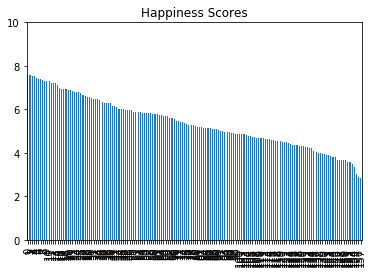

In [6]:
# let's visualize the happiness score of each country
happiness2015['Happiness Score'].plot(kind='bar', title='Happiness Scores', ylim=(0,10))

There are so many data points that we can't see any of the values or labels!

You may have noticed that each country in the `happiness2015` dataframe is assigned to a region, specified in the `Region` column.

In [7]:
# check the unique regions in dataset
happiness2015['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

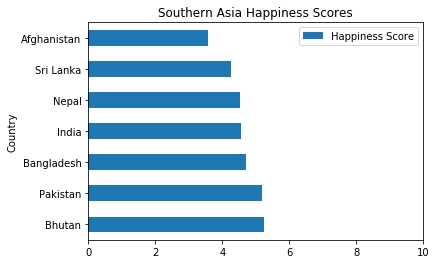

In [8]:
# try to plot just the region "Southern Asia"
so_asia = happiness2015[happiness2015['Region'] == 'Southern Asia']
so_asia.plot(x='Country', y='Happiness Score', kind='barh', title='Southern Asia Happiness Scores', xlim=(0,10))

⚡ You can try `kind="bar"` instead of `barh` to plot the bars vertically!

❓ **Question**: Find mean hapiness score for each region.

💡 **Hint**:

- Identify each unique group in the data set.
- For each group:
    - Select only the rows corresponding to that group.
    - Calculate the average for those rows.

In [9]:
mean_happiness = {} # create a dictionary to store the mean hapiness of retions
regions = happiness2015['Region'].unique() # check the unique regions in dataset 
for r in regions: # for each region
    region_group = happiness2015[happiness2015['Region'] == r] # only choose the rows where region is r
    region_mean = region_group['Happiness Score'].mean() # calculate the mean
    mean_happiness[r] = region_mean # assign to dictionary

mean_happiness

{'Western Europe': 6.689619047619048,
 'North America': 7.273,
 'Australia and New Zealand': 7.285,
 'Middle East and Northern Africa': 5.406899999999999,
 'Latin America and Caribbean': 6.144681818181818,
 'Southeastern Asia': 5.317444444444445,
 'Central and Eastern Europe': 5.332931034482758,
 'Eastern Asia': 5.626166666666666,
 'Sub-Saharan Africa': 4.202800000000001,
 'Southern Asia': 4.580857142857143}

## 👉  `groupby` operation

Next, we are going to perform these steps: 

1. Split the dataset into categories
2. Apply some function to each category. 
3. Combine the new results to a dataset

💡 `pandas` has  a built-in operation for this process: The `groupby` operation performs the "split-apply-combine" process on a dataframe:

1. Create a Groupby object.
2. Call a function on the Groupby object.

❓ Let's apply this operation to the previous tasks!

In [10]:
grouped = happiness2015.groupby('Region') # group dataset by the "Region" column (We do nothing yet!)
aus_nz = grouped.get_group('Australia and New Zealand') # select the data for the Australia and New Zealand group only
aus_nz

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


⭐ `GroupBy.get_group()` gives a dataframe containing just the rows for the countries in the `Australia and New Zealand`.

In [11]:
# take a look on `grouped`
grouped

⭐ It has a type, called `DataFrameGroupBy`, which is different from `Series` and `DataFrame`!

In [12]:
# you can get more information about the groupby object by using
grouped.groups

{'Australia and New Zealand': Int64Index([8, 9], dtype='int64'),
 'Central and Eastern Europe': Int64Index([ 30,  43,  44,  51,  53,  54,  55,  58,  59,  61,  63,  68,  69,
              72,  76,  79,  82,  85,  86,  88,  92,  94,  95, 103, 105, 110,
             126, 129, 133],
            dtype='int64'),
 'Eastern Asia': Int64Index([37, 45, 46, 71, 83, 99], dtype='int64'),
 'Latin America and Caribbean': Int64Index([ 11,  13,  15,  22,  24,  26,  29,  31,  32,  39,  40,  41,  42,
              47,  50,  52,  56,  57,  64,  97, 104, 118],
            dtype='int64'),
 'Middle East and Northern Africa': Int64Index([ 10,  19,  21,  27,  34,  38,  48,  62,  67,  75,  81,  91, 102,
             106, 107, 109, 111, 134, 135, 155],
            dtype='int64'),
 'North America': Int64Index([4, 14], dtype='int64'),
 'Southeastern Asia': Int64Index([23, 33, 60, 73, 74, 89, 98, 128, 144], dtype='int64'),
 'Southern Asia': Int64Index([78, 80, 108, 116, 120, 131, 152], dtype='int64'),
 'Sub-Saharan

⭐ The result also contains the index for each row in the original dataframe.

❓ Select the data for the North America.

In [13]:
na_group = grouped.get_group('North America')
na_group

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011


In [17]:
# other ways
north_america = happiness2015.iloc[[4,14]] # 4 and 14 are indexes indicated above
print(na_group == north_america) # check the similarity between 2 results

    Country  Region  Happiness Rank  Happiness Score  Standard Error  \
4      True    True            True             True            True   
14     True    True            True             True            True   

    Economy (GDP per Capita)  Family  Health (Life Expectancy)  Freedom  \
4                       True    True                      True     True   
14                      True    True                      True     True   

    Trust (Government Corruption)  Generosity  Dystopia Residual  
4                            True        True               True  
14                           True        True               True  


⭐ Compute the number of rows for each group.

In [20]:
grouped.size() # The result is a `Series`

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64

⭐ Beside of `.size()`, we also have other methods.

| Methods    | Description                               |
|------------|-------------------------------------------|
| `.mean()`  | Calculates the mean of groups.            |
| `.sum()`   | Calculates the sum of group values.       |
| `.size()`  | Calculates the size of the groups.        |
| `.count()` | Calculates the count of values in groups. |
| `.min()`   | Calculates the minimum of group values.   |
| `.max()`   | Calculates the maximum of group values.   |

In [22]:
# let's try with .mean()
grouped.mean()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980009
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
Sub-Saharan Africa,127.900000,4.202800,0.055299,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980


⭐ You may have noticed that `Region` appears in a different row than the rest of the column names. It's because that `Region` in this case is used to be the index of the dataframe.

<img src="img/Index_Example.png" width="600"/>

❓ **Question**: Select just the `Happiness Score` column from grouped and then compute its mean.

In [25]:
happy_grouped = grouped['Happiness Score']
happy_grouped.mean()

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

In [26]:
# you can do above by this way
grouped.mean()['Happiness Score']

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

❓ What if we wanted to apply more than one kind of aggregation to a column at a time (e.g. apply both `mean()` and `max()`)?

💡 Use `GroupBy.agg()` [method](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html).

In [29]:
# happy_grouped = grouped['Happiness Score']
happy_mean_max = happy_grouped.agg([np.mean, np.max])
happy_mean_max

,mean,amax
Region,,
Australia and New Zealand,7.285000,7.286
Central and Eastern Europe,5.332931,6.505
Eastern Asia,5.626167,6.298
Latin America and Caribbean,6.144682,7.226
Middle East and Northern Africa,5.406900,7.278
North America,7.273000,7.427
Southeastern Asia,5.317444,6.798
Southern Asia,4.580857,5.253
Sub-Saharan Africa,4.202800,5.477


Because `np.max` is an alias for `np.amax`, the corresponding column'name is `amax`.

In [30]:
# we can define a custom function and then apply `.agg`
def dif(group):
    return (group.max() - group.mean())

mean_max_dif = happy_grouped.agg(dif)
mean_max_dif

Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western Europe                     0.897381
Name: Happiness Score, dtype: float64

⭐ In practice, we combine all the steps to gether.

In [40]:
mean_max_dif = happiness2015.groupby('Region')['Happiness Score'].agg(dif)
type(mean_max_dif)

pandas.core.series.Series

<img src="img/PV_Syntax.png" width="500"/>

## 👉  `.pivot_table()` method

⭐ `index` and `values` are actually arguments used in another method used to aggregate data - the `DataFrame.pivot_table()` [method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html). We can perform the same result as in GroupBy.

In [44]:
# use GroupBy
happiness2015.groupby('Region')['Happiness Score'].mean()
# Type: Series

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

In [45]:
# use pivot_table
happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean)
# type: DataFrame

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


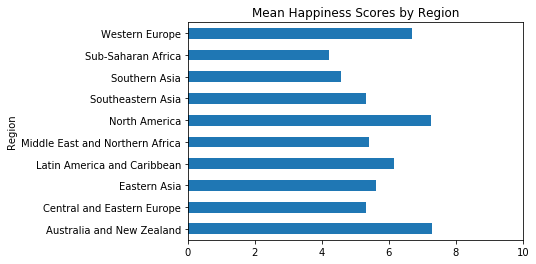

In [47]:
# we can apply normal dataframe filter to the above result
pv_happiness = happiness2015.pivot_table('Happiness Score', 'Region') 
# there is no 'aggfunc' because its default value is 'mean'
pv_happiness.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10), legend=False)

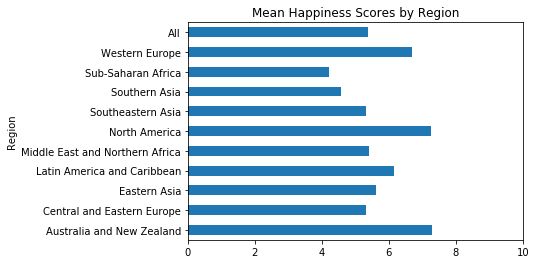

In [52]:
# plot the "All" group with option `margins=True`
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)
pv_happiness.plot(kind='barh', xlim=(0,10), title='Mean Happiness Scores by Region', legend=False)

`All` is the mean of the `Happiness Score` column. It is:

In [53]:
happiness2015['Happiness Score'].mean() # value of `All` bar

5.3757341772151905

⭐ We can aggregate multiple columns and apply multiple functions at once.

In [54]:
# we aggregate both the 'Happiness Score' and 'Family' columns in happiness2015 and group by the 'Region' column:
happiness2015.pivot_table(['Happiness Score', 'Family'], 'Region')

,Family,Happiness Score
Region,,
Australia and New Zealand,1.314450,7.285000
Central and Eastern Europe,1.053042,5.332931
Eastern Asia,1.099427,5.626167
Latin America and Caribbean,1.104720,6.144682
Middle East and Northern Africa,0.920490,5.406900
North America,1.284860,7.273000
Southeastern Asia,0.940468,5.317444
Southern Asia,0.645321,4.580857
Sub-Saharan Africa,0.809085,4.202800


In [56]:
# apply list of functions
happiness2015.pivot_table('Happiness Score', 'Region', aggfunc=[np.mean, np.min , np.max], margins=True)

mean                     amin  \
                                   Family Happiness Score   Family   
Region                                                               
Australia and New Zealand        1.314450        7.285000  1.30923   
Central and Eastern Europe       1.053042        5.332931  0.38562   
Eastern Asia                     1.099427        5.626167  0.94675   
Latin America and Caribbean      1.104720        6.144682  0.74302   
Middle East and Northern Africa  0.920490        5.406900  0.47489   
North America                    1.284860        7.273000  1.24711   
Southeastern Asia                0.940468        5.317444  0.62736   
Southern Asia                    0.645321        4.580857  0.30285   
Sub-Saharan Africa               0.809085        4.202800  0.00000   
Western Europe                   1.247302        6.689619  0.89318   
All                              0.991046        5.375734  0.00000   

                                                    amax                  
                                Happiness Score   Family Happiness Score  
Region                                                                    
Australia and New Zealand                 7.284  1.31967           7.286  
Central and Eastern Europe                4.218  1.34043           6.505  
Eastern Asia                              4.874  1.30060           6.298  
Latin America and Caribbean               4.518  1.30477           7.226  
Middle East and Northern Africa           3.006  1.22393           7.278  
North America                             7.119  1.32261           7.427  
Southeastern Asia                         3.819  1.26504           6.798  
Southern Asia                             3.575  1.10395           5.253  
Sub-Saharan Africa                        2.839  1.18468           5.477  
Western Europe                            4.857  1.40223           7.587  
All                                       2.839  1.40223           7.587

In [57]:
# apply both of them
happiness2015.pivot_table(['Happiness Score', 'Family'], 'Region', aggfunc=[np.mean, np.min , np.max], margins=True)

mean                     amin  \
                                   Family Happiness Score   Family   
Region                                                               
Australia and New Zealand        1.314450        7.285000  1.30923   
Central and Eastern Europe       1.053042        5.332931  0.38562   
Eastern Asia                     1.099427        5.626167  0.94675   
Latin America and Caribbean      1.104720        6.144682  0.74302   
Middle East and Northern Africa  0.920490        5.406900  0.47489   
North America                    1.284860        7.273000  1.24711   
Southeastern Asia                0.940468        5.317444  0.62736   
Southern Asia                    0.645321        4.580857  0.30285   
Sub-Saharan Africa               0.809085        4.202800  0.00000   
Western Europe                   1.247302        6.689619  0.89318   
All                              0.991046        5.375734  0.00000   

                                                    amax                  
                                Happiness Score   Family Happiness Score  
Region                                                                    
Australia and New Zealand                 7.284  1.31967           7.286  
Central and Eastern Europe                4.218  1.34043           6.505  
Eastern Asia                              4.874  1.30060           6.298  
Latin America and Caribbean               4.518  1.30477           7.226  
Middle East and Northern Africa           3.006  1.22393           7.278  
North America                             7.119  1.32261           7.427  
Southeastern Asia                         3.819  1.26504           6.798  
Southern Asia                             3.575  1.10395           5.253  
Sub-Saharan Africa                        2.839  1.18468           5.477  
Western Europe                            4.857  1.40223           7.587  
All                                       2.839  1.40223           7.587

In [58]:
# compare groupby and pivot_table
grouped = happiness2015.groupby('Region')[['Happiness Score','Family']]
happy_family_stats = grouped.agg([np.min, np.max, np.mean])
pv_happy_family_stats = happiness2015.pivot_table(['Happiness Score', 'Family'], 'Region', 
                                                  aggfunc=[np.min, np.max, np.mean], margins=True)

In [59]:
happy_family_stats # using groupby

Happiness Score                    Family  \
                                           amin   amax      mean     amin   
Region                                                                      
Australia and New Zealand                 7.284  7.286  7.285000  1.30923   
Central and Eastern Europe                4.218  6.505  5.332931  0.38562   
Eastern Asia                              4.874  6.298  5.626167  0.94675   
Latin America and Caribbean               4.518  7.226  6.144682  0.74302   
Middle East and Northern Africa           3.006  7.278  5.406900  0.47489   
North America                             7.119  7.427  7.273000  1.24711   
Southeastern Asia                         3.819  6.798  5.317444  0.62736   
Southern Asia                             3.575  5.253  4.580857  0.30285   
Sub-Saharan Africa                        2.839  5.477  4.202800  0.00000   
Western Europe                            4.857  7.587  6.689619  0.89318   

                                                    
                                    amax      mean  
Region                                              
Australia and New Zealand        1.31967  1.314450  
Central and Eastern Europe       1.34043  1.053042  
Eastern Asia                     1.30060  1.099427  
Latin America and Caribbean      1.30477  1.104720  
Middle East and Northern Africa  1.22393  0.920490  
North America                    1.32261  1.284860  
Southeastern Asia                1.26504  0.940468  
Southern Asia                    1.10395  0.645321  
Sub-Saharan Africa               1.18468  0.809085  
Western Europe                   1.40223  1.247302

In [60]:
pv_happy_family_stats # using pvot_table

amin                     amax  \
                                  Family Happiness Score   Family   
Region                                                              
Australia and New Zealand        1.30923           7.284  1.31967   
Central and Eastern Europe       0.38562           4.218  1.34043   
Eastern Asia                     0.94675           4.874  1.30060   
Latin America and Caribbean      0.74302           4.518  1.30477   
Middle East and Northern Africa  0.47489           3.006  1.22393   
North America                    1.24711           7.119  1.32261   
Southeastern Asia                0.62736           3.819  1.26504   
Southern Asia                    0.30285           3.575  1.10395   
Sub-Saharan Africa               0.00000           2.839  1.18468   
Western Europe                   0.89318           4.857  1.40223   
All                              0.00000           2.839  1.40223   

                                                     mean                  
                                Happiness Score    Family Happiness Score  
Region                                                                     
Australia and New Zealand                 7.286  1.314450        7.285000  
Central and Eastern Europe                6.505  1.053042        5.332931  
Eastern Asia                              6.298  1.099427        5.626167  
Latin America and Caribbean               7.226  1.104720        6.144682  
Middle East and Northern Africa           7.278  0.920490        5.406900  
North America                             7.427  1.284860        7.273000  
Southeastern Asia                         6.798  0.940468        5.317444  
Southern Asia                             5.253  0.645321        4.580857  
Sub-Saharan Africa                        5.477  0.809085        4.202800  
Western Europe                            7.587  1.247302        6.689619  
All                                       7.587  0.991046        5.375734

⭐ They give the same result but using `groupby` gives better arranged columns than using `pivot_table`.